<a href="https://colab.research.google.com/github/MajumdarAritra/Cancer_prediction_KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive/")
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv("KNNAlgorithmDataset.csv")
df = df.drop(['id', 'Unnamed: 31'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,NaN,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             563 non-null    float64
 2   texture_mean            566 non-null    float64
 3   perimeter_mean          568 non-null    float64
 4   area_mean               568 non-null    float64
 5   smoothness_mean         568 non-null    float64
 6   compactness_mean        568 non-null    float64
 7   concavity_mean          564 non-null    float64
 8   concave points_mean     568 non-null    float64
 9   symmetry_mean           568 non-null    float64
 10  fractal_dimension_mean  567 non-null    float64
 11  radius_se               568 non-null    float64
 12  texture_se              567 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [ ]:
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
count,563.000000,566.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000,568.000000,567.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.122165,19.285848,91.977218,655.064789,0.096319,0.104321,0.088573,0.049005,0.181146,0.062791,...,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076
std,3.530088,4.303713,24.319614,352.199347,0.014042,0.052857,0.079730,0.038783,0.027436,0.007072,...,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500
25%,11.685000,16.170000,75.135000,420.175000,0.086290,0.064815,0.029540,0.020348,0.161900,0.057695,...,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400
50%,13.370000,18.855000,86.210000,548.750000,0.095865,0.092525,0.060705,0.033600,0.179200,0.061490,...,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200
75%,15.815000,21.795000,104.150000,784.150000,0.105300,0.130425,0.129650,0.074010,0.195700,0.066135,...,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

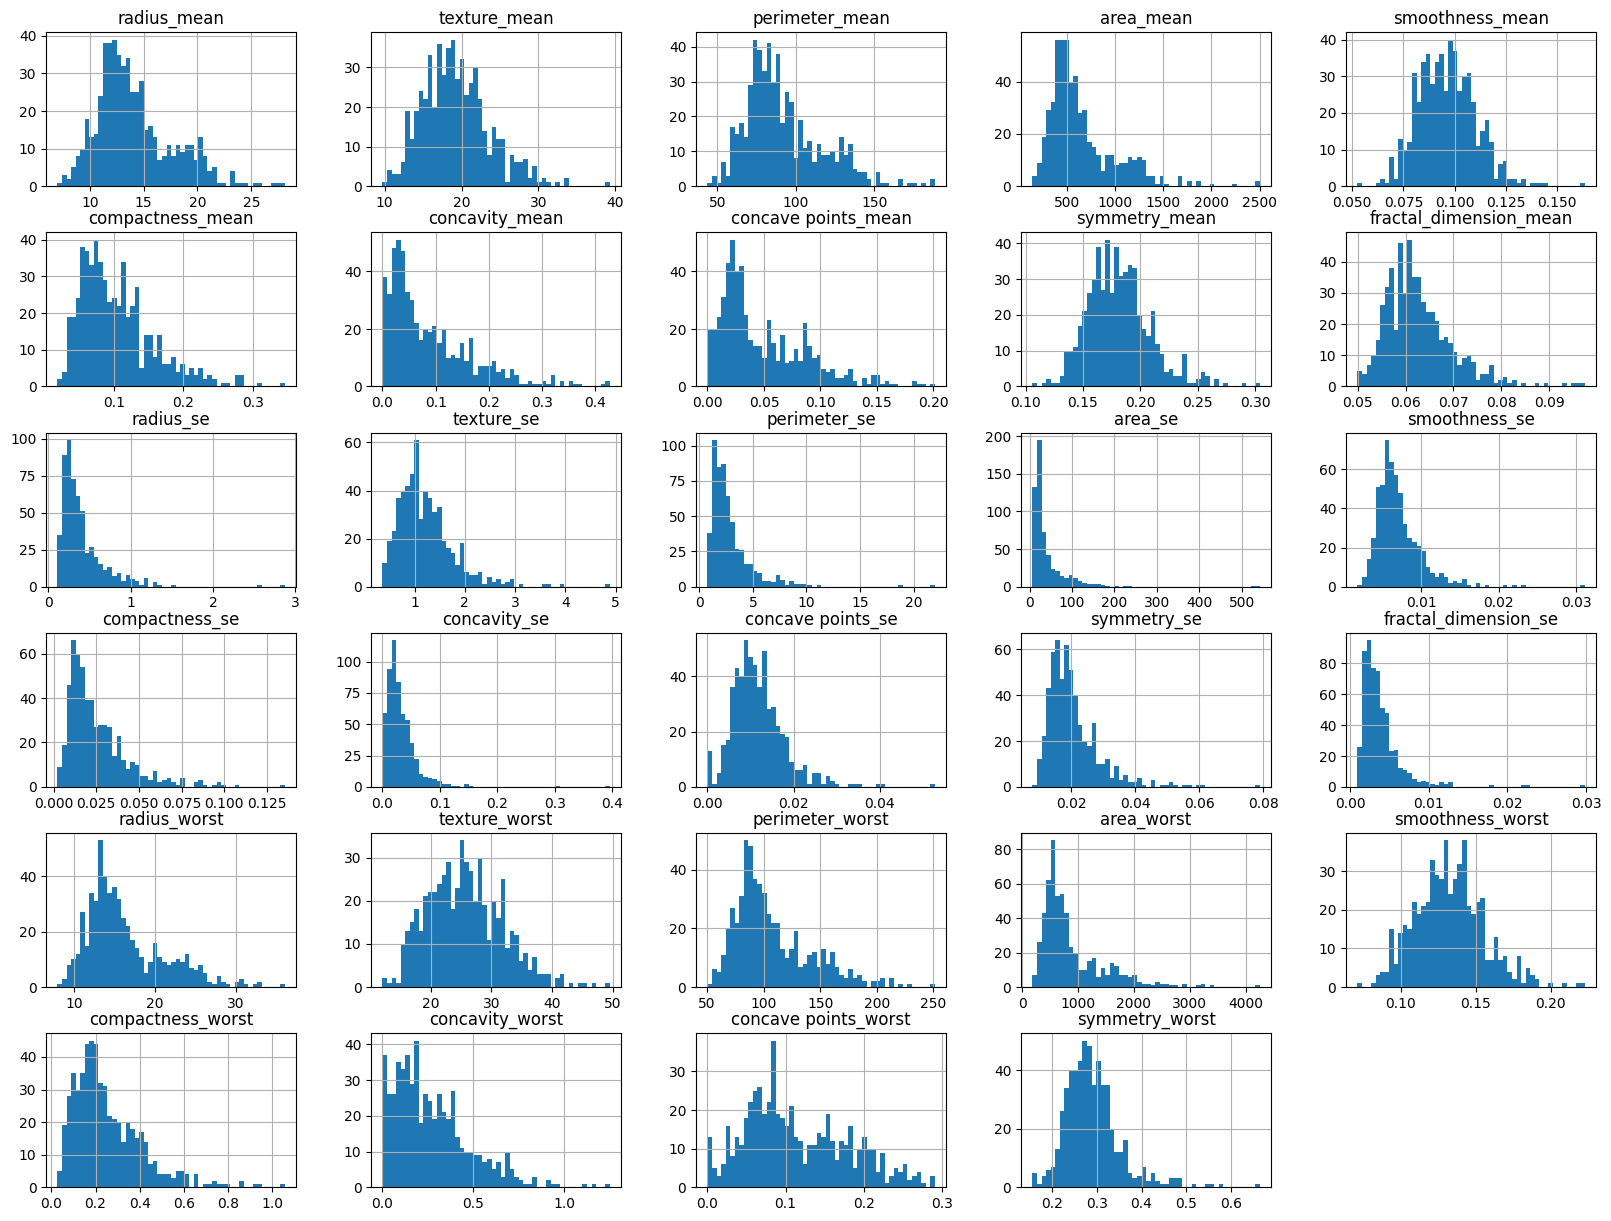

In [ ]:
df.hist(bins=50,figsize=(20,15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size = 0.2,random_state=42)



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['diagnosis']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]



In [ ]:
df = strat_train_set.copy()
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,0.003042,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948
170,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,0.002248,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827
407,B,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,...,0.007731,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488
430,M,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,...,0.005784,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866
27,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,B,13.03,NaN,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987
415,B,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,...,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075
458,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306
476,B,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534


array([[<Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='texture_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='texture_mean'>,
        <Axes: xlabel='texture_mean', ylabel='texture_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='texture_mean'>,
        <Axes: xlabel='area_mean', ylabel='texture_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='texture_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='area_mean', ylabel='perimeter_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='area_mean'>,
        <Axes: xlabel='texture_mean', ylabel='area_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='area_mean'>,
        <Axes: xlabel='area_mean', ylabel='area_mean'>]], dtype=object)

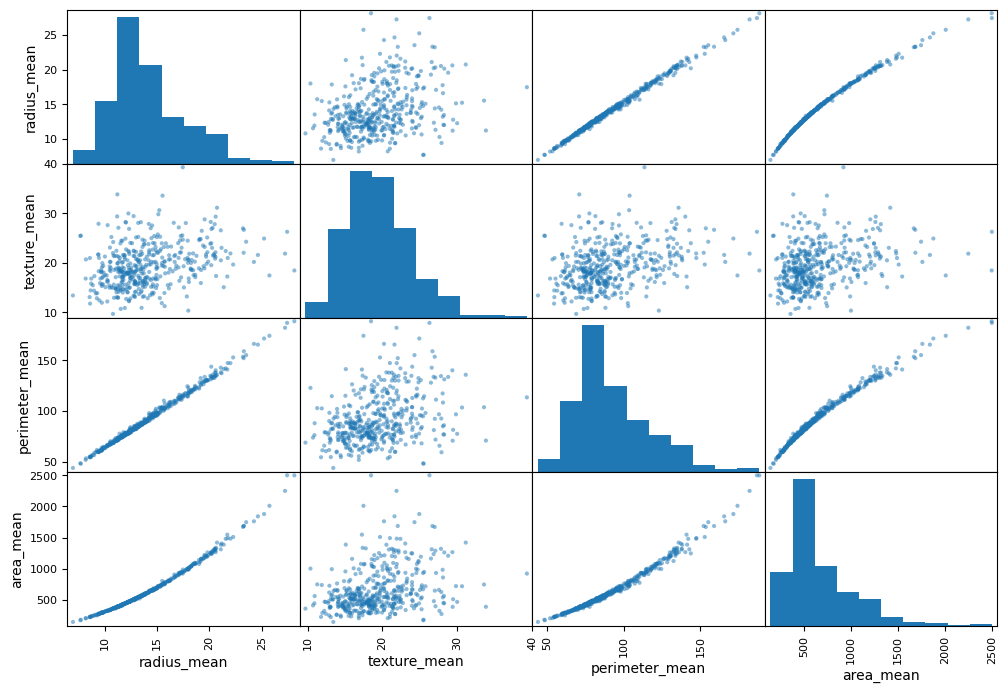

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["radius_mean","texture_mean","perimeter_mean","area_mean"]
scatter_matrix(df[attributes],figsize = (12,8))

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

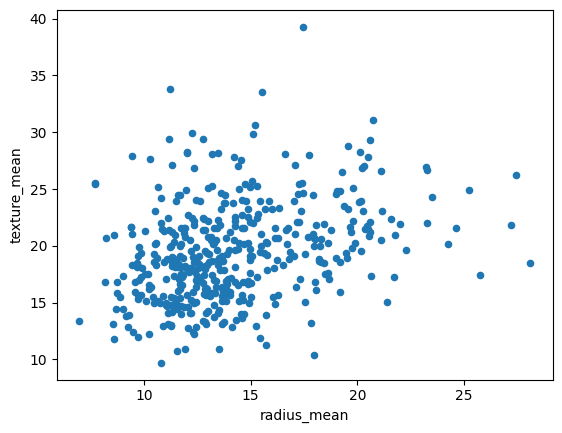

In [ ]:
df.plot(kind="scatter",x="radius_mean",y ="texture_mean" )

In [ ]:
df = strat_train_set.drop("diagnosis",axis=1)
df_label= strat_train_set["diagnosis"].copy()
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,0.003042,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,0.002248,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,0.007731,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,0.005784,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,NaN,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler()),
                       ('scaler', MinMaxScaler())])


In [ ]:
df_num_tr = my_pipeline.fit_transform(df)
df_num_tr

array([[0.42780065, 0.45755834, 0.40709004, ..., 0.11653355, 0.34278351,
        0.27261975],
       [0.25268588, 0.0906324 , 0.24227766, ..., 0.09920128, 0.32271478,
        0.24876799],
       [0.27776989, 0.39431857, 0.26839887, ..., 0.14680511, 0.19247423,
        0.18194362],
       ...,
       [0.28486914, 0.52147447, 0.26826066, ..., 0.03563898, 0.20347079,
        0.14606742],
       [0.34166312, 0.3659114 , 0.33598231, ..., 0.20063898, 0.46013746,
        0.19101124],
       [0.4770221 , 0.38180588, 0.46997443, ..., 0.31309904, 0.62783505,
        0.2085551 ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(df_num_tr,df_label)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_test = strat_test_set.drop('diagnosis',axis=1)
y_test = strat_test_set['diagnosis'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions=Knn.predict(x_test_prepared)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final_predictions)

print(accuracy)

0.956140350877193


In [ ]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, final_predictions)


print(cm)


[[71  1]
 [ 4 38]]
